In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [3]:
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
x,y=mnist['data'],mnist['target']
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

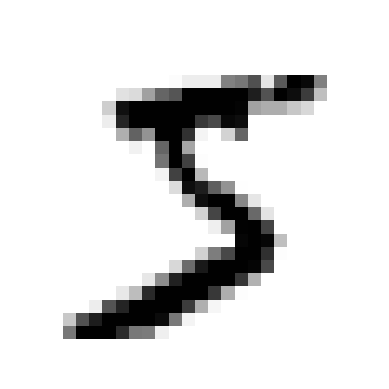

In [7]:
some_digit=x.iloc[0].values
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [8]:
y[0]

'5'

In [9]:
y=y.astype(int)

In [10]:
y[0]

np.int64(5)

In [11]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [12]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict([some_digit])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [14]:
accuracy = sgd_clf.score(x_test, y_test_5)
print(f"Accuracy of SGDClassifier on the test set: {accuracy:.4f}")

Accuracy of SGDClassifier on the test set: 0.9492


In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

In [17]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [19]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [20]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343847

In [22]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method="predict_proba")

In [23]:
from sklearn.metrics import roc_curve
y_score_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_score_forest)

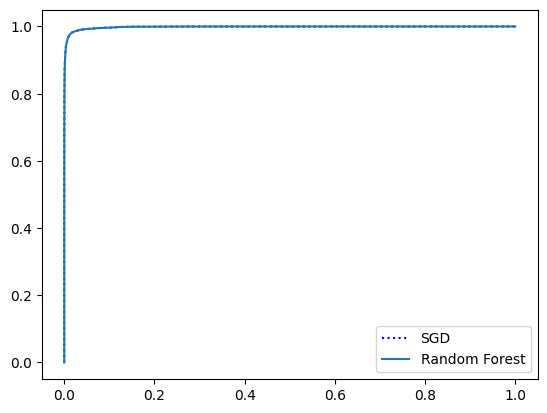

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_score_forest)
plt.plot(fpr_forest,tpr_forest,"b:",label="SGD")
# plot_roc_curve(forest_clf,x_train,y_train_5) # This function is not defined
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right")
plt.show()

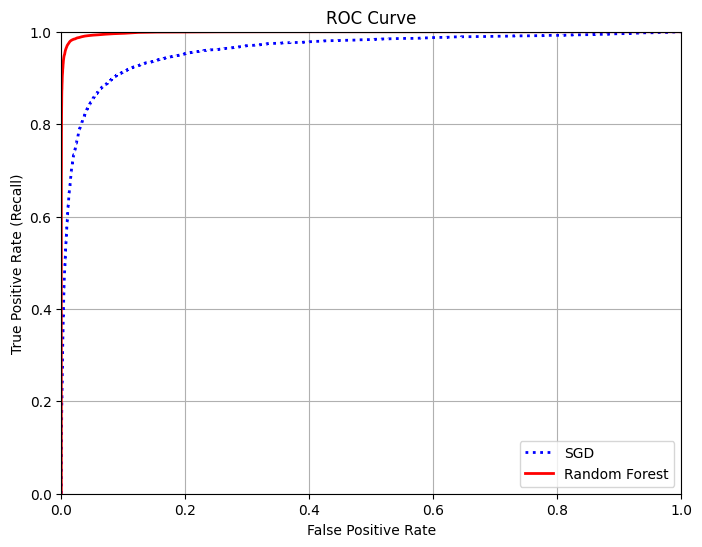

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_sgd, tpr_sgd, "b:", linewidth=2, label="SGD") # Use SGD metrics
plt.plot(fpr_forest, tpr_forest, "r-", linewidth=2, label="Random Forest") # Use Random Forest metrics

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.axis([0, 1, 0, 1]) # Ensure the axes cover the full range

plt.show()

In [26]:
from sklearn.metrics import roc_curve

y_scores_sgd = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_5, y_scores_sgd)

In [18]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(x_train,y_train)
svm_clf.predict([some_digit])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5])

In [29]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [30]:
np.argmax(some_digit_scores)

np.int64(5)

In [31]:
svm_clf.classes_[5]

np.int64(5)

In [17]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC())
ovr_clf.fit(x_train,y_train)
ovr_clf.predict([some_digit])

NameError: name 'SVC' is not defined

In [33]:
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3])

In [34]:
sgd_clf.decision_function([some_digit])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring="accuracy")

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [16]:
y_train_pred=cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

NameError: name 'cross_val_predict' is not defined

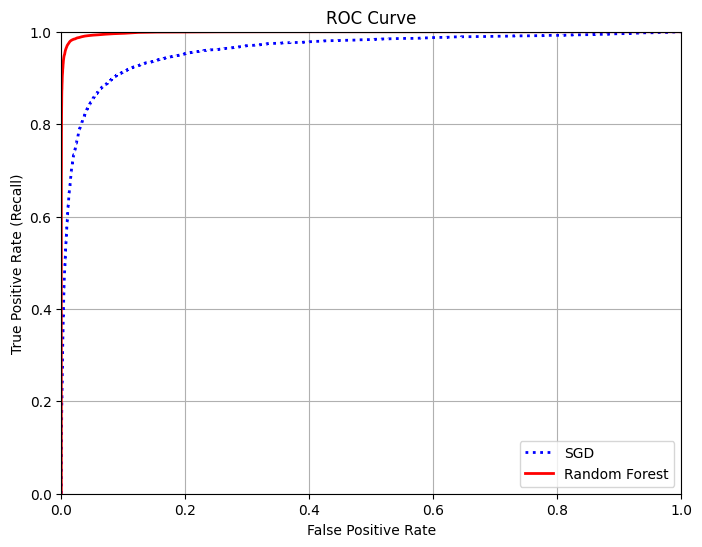

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_sgd, tpr_sgd, "b:", linewidth=2, label="SGD")
plt.plot(fpr_forest, tpr_forest, "r-", linewidth=2, label="Random Forest")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.axis([0, 1, 0, 1])

plt.show()

In [15]:
cl_a, cl_b=3,5
x_aa=x_train[ (y_train==cl_a) & (y_train_pred==cl_a)].values
x_ab=x_train[ (y_train==cl_a) & (y_train_pred==cl_b)].values
x_ba=x_train[ (y_train==cl_b) & (y_train_pred==cl_a)].values
x_bb=x_train[ (y_train==cl_b) & (y_train_pred==cl_b)].values
plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(x_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(x_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(x_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(x_bb[:25], images_per_row=5)
plt.show()

NameError: name 'y_train_pred' is not defined

In [13]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty_cols = images_per_row - (len(instances) % images_per_row) % images_per_row
    empty_square = np.zeros((size, size), dtype=np.uint8)
    for row in range(n_rows):
        rimages = instances[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(
            [instance.reshape(size, size) for instance in rimages] +
            [empty_square] * n_empty_cols)
    image = np.concatenate([np.concatenate(row_images[row], axis=1)
                            for row in range(n_rows)], axis=0)
    extent = (0, image.shape[1] / size, 0, image.shape[0] / size)
    plt.imshow(image, cmap="binary", extent=extent, **options)
    plt.axis("off")

In [19]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_multilabel)

KNeighborsClassifier()

In [20]:
knn_clf.predict([some_digit])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf_all=KNeighborsClassifier();
y_train_0=(y_train==0);
y_train_1=(y_train==1);
y_train_2=(y_train==2);
y_train_3=(y_train==3);
y_train_4=(y_train==4);
y_train_5=(y_train==5);
y_train_6=(y_train==6);
y_train_7=(y_train==7);
y_train_8=(y_train==8);
y_train_9=(y_train==9);
y_multilabel_all=np.c_[y_train_0,y_train_1,y_train_2,y_train_3,y_train_4,y_train_5,y_train_6,y_train_7,y_train_8,y_train_9]
knn_clf_all.fit(x_train,y_multilabel_all)

KNeighborsClassifier()

In [23]:
knn_clf_all.predict([some_digit])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False, False, False, False, False,  True, False, False, False,
        False]])

In [24]:
y_pred_all=knn_clf_all.predict(x_test)

In [25]:
y_test_0=(y_test==0);
y_test_1=(y_test==1);
y_test_2=(y_test==2);
y_test_3=(y_test==3);
y_test_4=(y_test==4);
y_test_5=(y_test==5);
y_test_6=(y_test==6);
y_test_7=(y_test==7);
y_test_8=(y_test==8);
y_test_9=(y_test==9);
y_multilabel_test=np.c_[y_test_0,y_test_1,y_test_2,y_test_3,y_test_4,y_test_5,y_test_6,y_test_7,y_test_8,y_test_9]

In [26]:
from sklearn.metrics import f1_score
f1_macro = f1_score(y_multilabel_test, y_pred_all, average="macro")
print(f"Macro F1 Score: {f1_macro:.4f}")

Macro F1 Score: 0.9698


In [28]:
from sklearn.metrics import precision_score
precision_all =precision_score(y_multilabel_test,y_pred_all,average="macro")
precision_all

0.974293387739014

In [30]:
from sklearn.metrics import recall_score
recall_all=recall_score(y_multilabel_test,y_pred_all,average="macro")
recall_all

0.9656038452339443

In [31]:
from sklearn.metrics import accuracy_score
accuracy_all=accuracy_score(y_multilabel_test,y_pred_all)
accuracy_all

0.966

In [32]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_multilabel_test,y_pred_all)
conf_mat

ValueError: multilabel-indicator is not supported

In [33]:
from sklearn.metrics import confusion_matrix

for i in range(10):
    print(f"Confusion Matrix for digit {i}:")
    conf_mat_i = confusion_matrix(y_multilabel_test[:, i], y_pred_all[:, i])
    print(conf_mat_i)
    print("-" * 20)

Confusion Matrix for digit 0:
[[8992   28]
 [   7  973]]
--------------------
Confusion Matrix for digit 1:
[[8821   44]
 [   4 1131]]
--------------------
Confusion Matrix for digit 2:
[[8954   14]
 [  45  987]]
--------------------
Confusion Matrix for digit 3:
[[8965   25]
 [  39  971]]
--------------------
Confusion Matrix for digit 4:
[[8999   19]
 [  40  942]]
--------------------
Confusion Matrix for digit 5:
[[9085   23]
 [  38  854]]
--------------------
Confusion Matrix for digit 6:
[[9025   17]
 [  13  945]]
--------------------
Confusion Matrix for digit 7:
[[8936   36]
 [  42  986]]
--------------------
Confusion Matrix for digit 8:
[[9016   10]
 [  65  909]]
--------------------
Confusion Matrix for digit 9:
[[8948   43]
 [  47  962]]
--------------------


In [34]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_multilabel_test[:,1],y_pred_all[:,1])


In [35]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

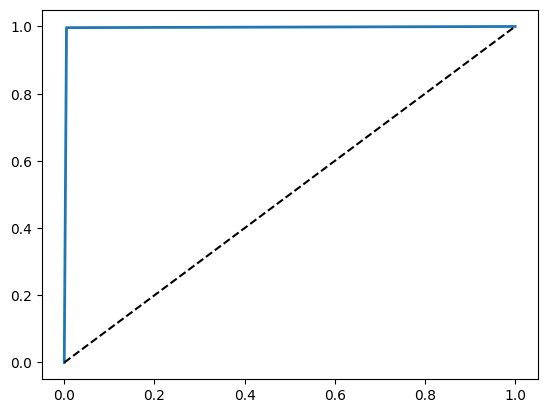

In [36]:
plot_roc_curve(fpr,tpr)
plt.show()

In [37]:
import joblib
model_filename='knn_mnist_multilabel_model.jablib'
joblib.dump(knn_clf_all,model_filename)

print(f"Model exported successfully to {model_filename}")

Model exported successfully to knn_mnist_multilabel_model.jablib
